In [25]:
import pandas as pd
import re
import inflect
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

reviews = pd.read_csv("yelp_singapore_restaurants_reviews.csv", encoding = "ISO-8859-1")
reviews.head()

,restaurant,content,stars,date
0,Sungei Road Laksa,The food has been phenomenal Laksa was awesome...,5,2018-12-18T00:00:00
1,Sungei Road Laksa,"When we got to this hawker center, we immediat...",4,2019-12-21T00:00:00
2,Sungei Road Laksa,Laksa is a popular Southeast Asia spicy noodle...,4,2019-05-16T00:00:00
3,Sungei Road Laksa,Laska is not my thing and after trying this st...,4,2019-04-28T00:00:00
4,Sungei Road Laksa,Laksa here is so good! Tasty and rich in flavo...,5,2019-01-03T00:00:00


In [57]:
reviews.tail()

,restaurant,content,stars,date
10121,Ocean Curry Fish Head,I'm surprised at how good the fish head curry ...,5,2016-01-31T00:00:00
10122,Ocean Curry Fish Head,Absolutely yummy goodness. ýýýýThe restaurant ...,4,2018-07-01T00:00:00
10123,Ocean Curry Fish Head,$45 for 2... curry fishhead plus 3 side dishes...,4,2014-12-31T00:00:00
10124,Ocean Curry Fish Head,I'll be frank to say that the food is not chea...,4,2014-12-31T00:00:00
10125,Shan E Punjab,This is hawker stall food at its finest. We ha...,5,2018-07-23T00:00:00


In [53]:
reviews.shape

(10126, 4)

In [23]:
# Cleaning the Data
def clean(data):
    
    # Removing leading and trailing white spaces
    data = str(data).strip()
    
    # Converting all text to lower case
    data = data.lower() 
    
    # Converting all numbers to words
    word = data.split(' ')
    p = inflect.engine()
    word = ' '.join([i for i in word if not i.isdigit()])
    word = re.sub(r'\d+', p.number_to_words(word) , word)    
    
    # Removing Punctuation
    translator = str.maketrans('', '', string.punctuation)
    word = word.translate(translator)
    
    # Removing Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(word)
    word = ' '.join([i for i in tokens if not i in stop_words])

    return word

# clean text data
reviews["content_clean"] = reviews["content"].apply(lambda x: clean(x))
reviews.head()

,restaurant,content,stars,date,content_clean
0,Sungei Road Laksa,The food has been phenomenal Laksa was awesome...,5,2018-12-18T00:00:00,food phenomenal laksa awesome cheap yet heavy
1,Sungei Road Laksa,"When we got to this hawker center, we immediat...",4,2019-12-21T00:00:00,got hawker center immediately saw sungei road ...
2,Sungei Road Laksa,Laksa is a popular Southeast Asia spicy noodle...,4,2019-05-16T00:00:00,laksa popular southeast asia spicy noodle soup...
3,Sungei Road Laksa,Laska is not my thing and after trying this st...,4,2019-04-28T00:00:00,laska thing trying still thing love noodles so...
4,Sungei Road Laksa,Laksa here is so good! Tasty and rich in flavo...,5,2019-01-03T00:00:00,laksa good tasty rich flavor line always long ...


In [10]:
restaurant_names = []

for i in reviews['restaurant']:
    if not i in restaurant_names:
        restaurant_names.append(i)
        
restaurant_dict = dict()

for index, i in enumerate(restaurant_names):
    restaurant_dict[i] = index
    
reviews['enum_restaurant'] = reviews['restaurant'].apply(lambda x : restaurant_dict[x])

Text(0,0.5,'Frequency of Reviews')

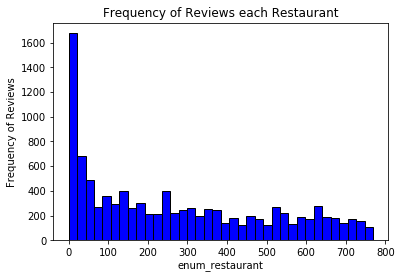

In [86]:
plt.hist(reviews['enum_restaurant'], color = 'blue', edgecolor = 'black',bins = int(180/5))
plt.title("Frequency of Reviews each Restaurant")
plt.xlabel("enum_restaurant")
plt.ylabel("Frequency of Reviews")

Text(0,0.5,'Frequency of Restaurants')

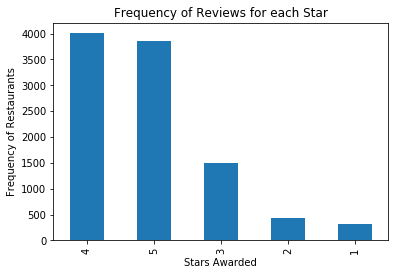

In [26]:
reviews['stars'].value_counts().plot('bar')
plt.title("Frequency of Reviews for each Star")
plt.xlabel("Stars Awarded")
plt.ylabel("Frequency of Restaurants")